In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../data/raw/wine_data.csv")
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,11.6,0.580,0.66,2.20,0.074,10.0,47.0,1.00080,3.25,0.57,9.0,3
1,10.4,0.610,0.49,2.10,0.200,5.0,16.0,0.99940,3.16,0.63,8.4,3
2,7.4,1.185,0.00,4.25,0.097,5.0,14.0,0.99660,3.63,0.54,10.7,3
3,10.4,0.440,0.42,1.50,0.145,34.0,48.0,0.99832,3.38,0.86,9.9,3
4,8.3,1.020,0.02,3.40,0.084,6.0,11.0,0.99892,3.48,0.49,11.0,3


In [3]:
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000
mean,9.797079,0.774796,0.793870,31.289348,0.200245,129.442333,229.008762,1.009972,3.158712,1.020641,11.291716,6.000000
std,2.413919,0.365015,0.384833,19.015391,0.124933,77.167262,100.183265,0.012032,0.171371,0.408304,1.182198,2.000048
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,7.600000,0.430000,0.410000,9.800000,0.072000,45.000000,150.000000,0.997417,3.030000,0.620000,10.400000,4.000000
50%,10.000000,0.830000,0.870000,37.600000,0.205000,145.800000,240.500000,1.012200,3.150000,1.080000,11.300000,6.000000
75%,11.800000,1.080000,1.110000,46.800000,0.298000,194.325000,311.625000,1.019840,3.270000,1.360000,12.200000,8.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         21000 non-null  float64
 1   volatile_acidity      21000 non-null  float64
 2   citric_acid           21000 non-null  float64
 3   residual_sugar        21000 non-null  float64
 4   chlorides             21000 non-null  float64
 5   free_sulfur_dioxide   21000 non-null  float64
 6   total_sulfur_dioxide  21000 non-null  float64
 7   density               21000 non-null  float64
 8   pH                    21000 non-null  float64
 9   sulphates             21000 non-null  float64
 10  alcohol               21000 non-null  float64
 11  quality               21000 non-null  int64  
dtypes: float64(11), int64(1)
memory usage: 1.9 MB


In [5]:
df.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## Exploratory Data Analysis (EDA)

Visualizing the data to understand patterns and relationships.

### Target Variable Distribution

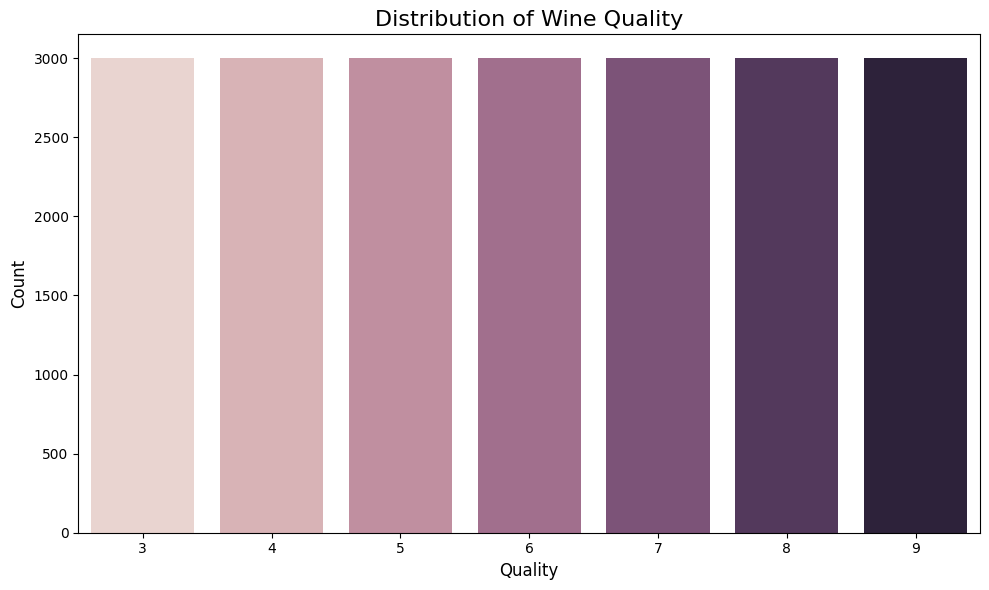

In [6]:
# Countplot for quality distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='quality', hue='quality', legend=False)
plt.title('Distribution of Wine Quality', fontsize=16)
plt.xlabel('Quality', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()

### Histograms with KDE

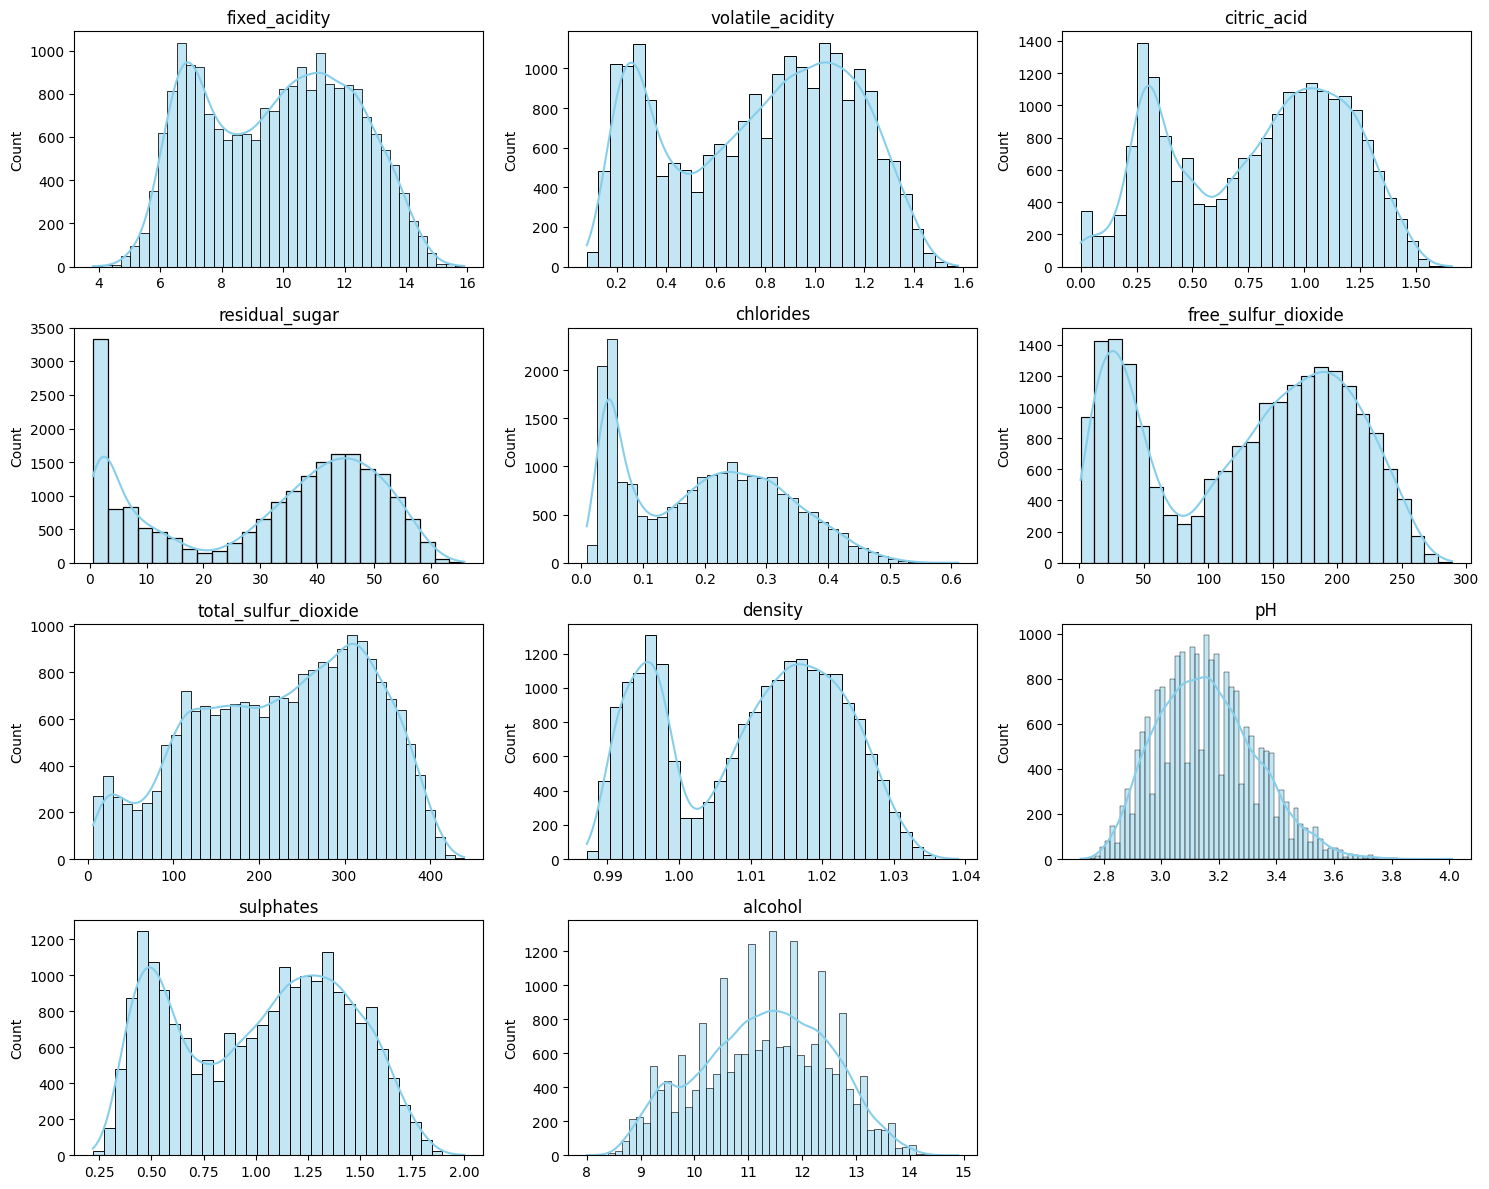

In [10]:
# Get numerical features (excluding Id and quality)
numerical_features = df.drop(['quality'], axis=1).select_dtypes(include=['float64', 'int64']).columns.tolist()

# Create histograms with KDE for all numerical features
fig, axes = plt.subplots(4, 3, figsize=(15, 12))
axes = axes.flatten()

for idx, col in enumerate(numerical_features):
    sns.histplot(df[col], kde=True, ax=axes[idx], color='skyblue')
    axes[idx].set_title(f'{col}', fontsize=12)
    axes[idx].set_xlabel('')

# Remove extra subplots if any
for idx in range(len(numerical_features), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

### Box Plots for Features

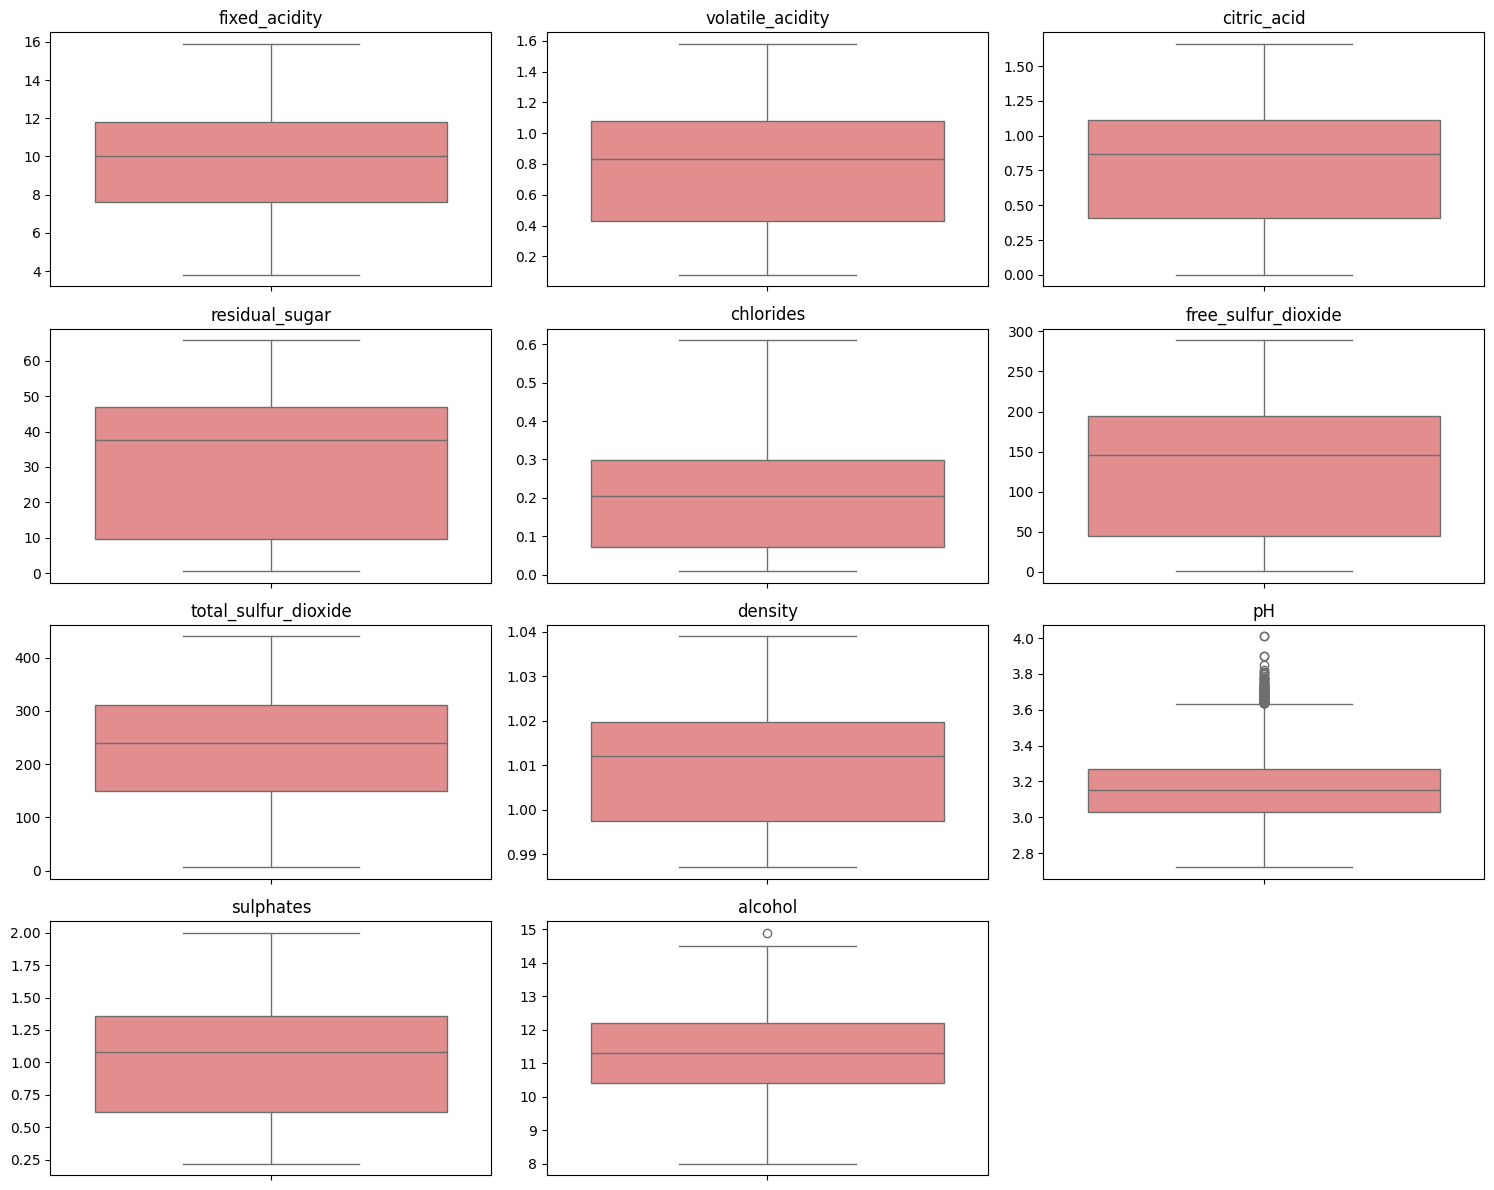

In [11]:
# Box plots to identify outliers
fig, axes = plt.subplots(4, 3, figsize=(15, 12))
axes = axes.flatten()

for idx, col in enumerate(numerical_features):
    sns.boxplot(y=df[col], ax=axes[idx], color='lightcoral')
    axes[idx].set_title(f'{col}', fontsize=12)
    axes[idx].set_ylabel('')

# Remove extra subplots if any
for idx in range(len(numerical_features), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

### Outlier Removal using IQR Method

In [13]:
# Remove outliers using IQR method
def remove_outliers_iqr(df, columns, multiplier=1.5):
    """
    Remove outliers using the IQR method
    multiplier: typically 1.5 for outliers, 3.0 for extreme outliers
    """
    df_clean = df.copy()
    initial_rows = len(df_clean)
    
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - multiplier * IQR
        upper_bound = Q3 + multiplier * IQR
        
        # Count outliers
        outliers = df_clean[(df_clean[col] < lower_bound) | (df_clean[col] > upper_bound)]
        print(f"{col}: {len(outliers)} outliers (lower={lower_bound:.3f}, upper={upper_bound:.3f})")
        
        # Remove outliers
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    
    final_rows = len(df_clean)
    print(f"\nRows before: {initial_rows}")
    print(f"Rows after: {final_rows}")
    print(f"Rows removed: {initial_rows - final_rows} ({100 * (initial_rows - final_rows) / initial_rows:.2f}%)")
    
    return df_clean

# Apply outlier removal
df_clean = remove_outliers_iqr(df, numerical_features, multiplier=2.0)

# Update df with cleaned data
df = df_clean.copy()
df.describe()

fixed_acidity: 0 outliers (lower=-0.800, upper=20.200)
volatile_acidity: 0 outliers (lower=-0.870, upper=2.380)
citric_acid: 0 outliers (lower=-0.990, upper=2.510)
residual_sugar: 0 outliers (lower=-64.200, upper=120.800)
chlorides: 0 outliers (lower=-0.380, upper=0.750)
free_sulfur_dioxide: 0 outliers (lower=-250.750, upper=491.125)
total_sulfur_dioxide: 0 outliers (lower=-173.350, upper=635.025)
density: 0 outliers (lower=0.953, upper=1.065)
pH: 16 outliers (lower=2.550, upper=3.750)
sulphates: 0 outliers (lower=-0.860, upper=2.840)
alcohol: 0 outliers (lower=6.800, upper=15.800)

Rows before: 20998
Rows after: 20982
Rows removed: 16 (0.08%)


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,20982.000000,20982.000000,20982.000000,20982.000000,20982.000000,20982.000000,20982.000000,20982.000000,20982.000000,20982.000000,20982.000000,20982.000000
mean,9.800627,0.775062,0.794297,31.312415,0.200349,129.513226,229.111067,1.009984,3.158138,1.021007,11.291599,6.000048
std,2.411728,0.364968,0.384582,19.005952,0.124914,77.142631,100.150650,0.012028,0.170305,0.408280,1.182271,2.000727
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,7.600000,0.430000,0.410000,9.900000,0.072000,46.000000,150.000000,0.997450,3.030000,0.620000,10.400000,4.000000
50%,10.000000,0.830000,0.870000,37.600000,0.205000,145.800000,240.600000,1.012200,3.150000,1.080000,11.300000,6.000000
75%,11.800000,1.080000,1.110000,46.800000,0.298000,194.400000,311.700000,1.019850,3.270000,1.360000,12.200000,8.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,3.750000,2.000000,14.900000,9.000000


### Box Plots after cleaning

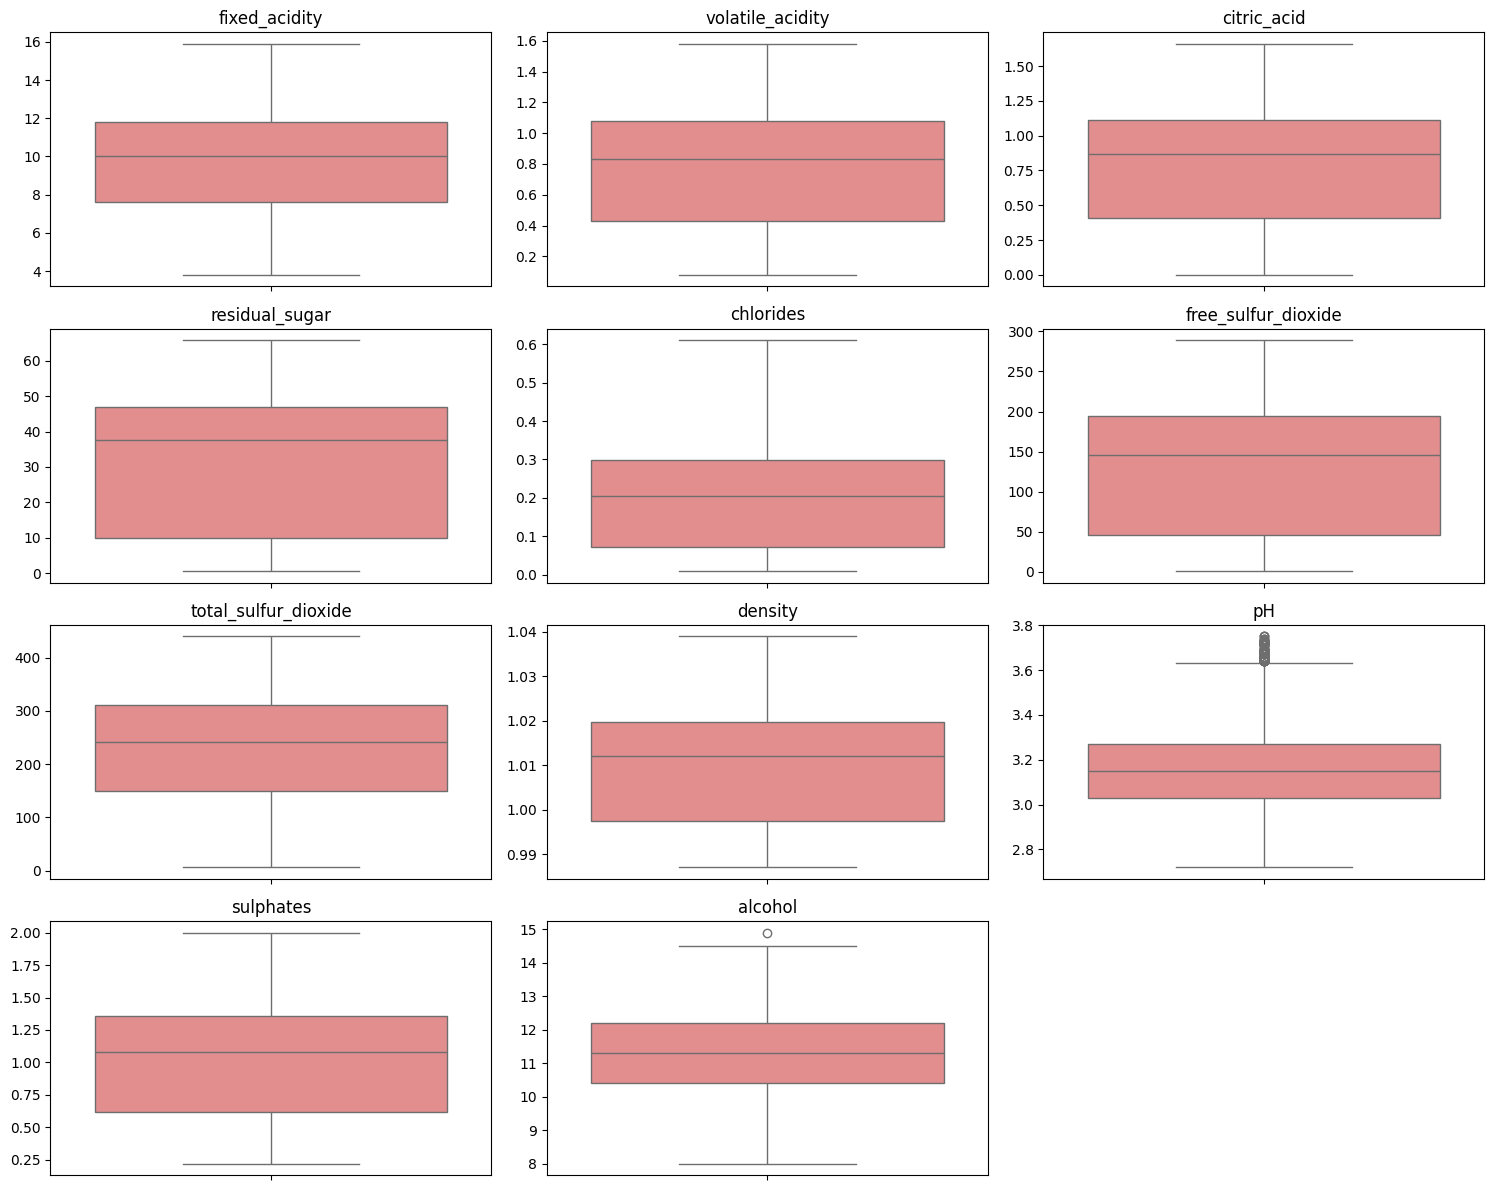

In [14]:
# Box plots to identify outliers
fig, axes = plt.subplots(4, 3, figsize=(15, 12))
axes = axes.flatten()

for idx, col in enumerate(numerical_features):
    sns.boxplot(y=df[col], ax=axes[idx], color='lightcoral')
    axes[idx].set_title(f'{col}', fontsize=12)
    axes[idx].set_ylabel('')

# Remove extra subplots if any
for idx in range(len(numerical_features), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

### Correlation Heatmap

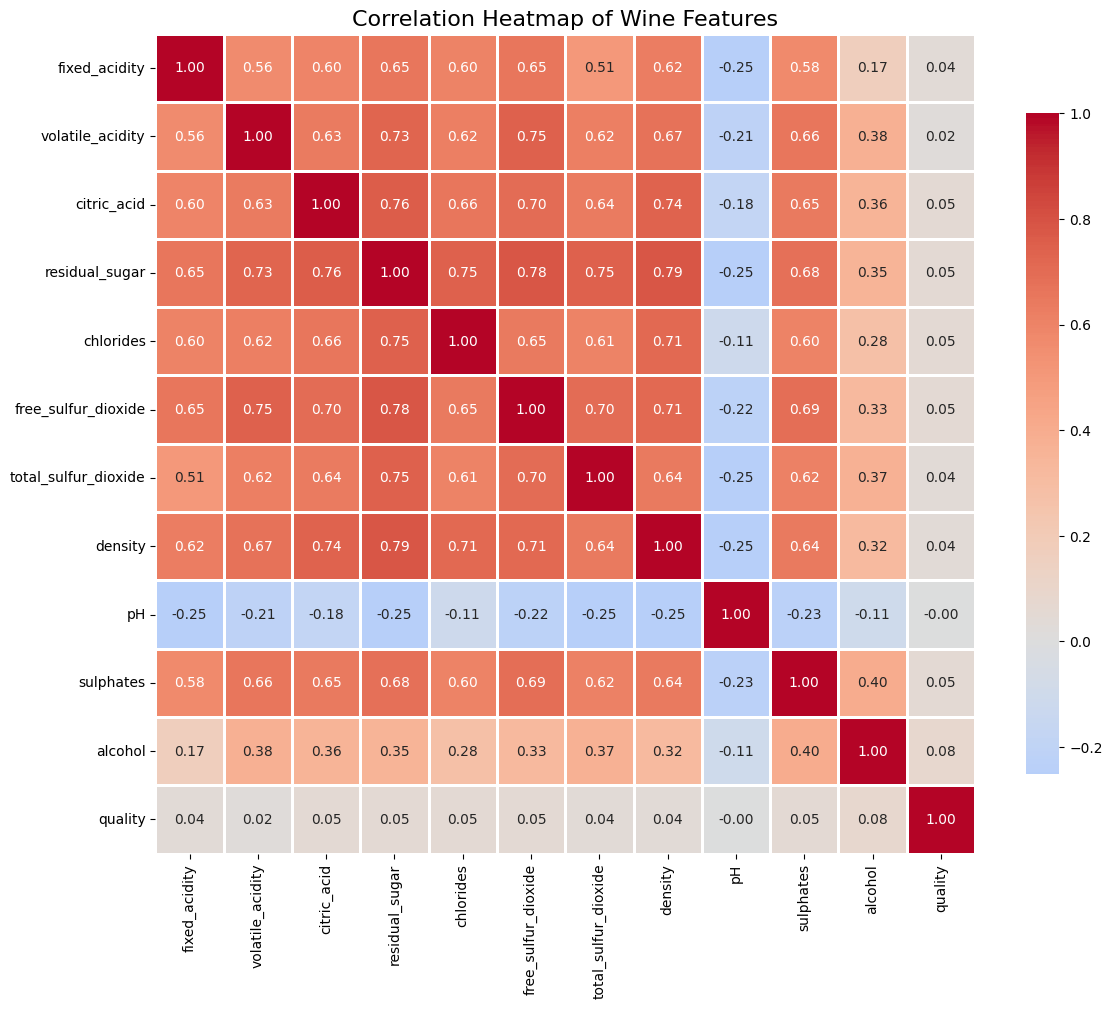

In [15]:
# Correlation heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = df[numerical_features + ['quality']].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap of Wine Features', fontsize=16)
plt.tight_layout()
plt.show()

### Pair Plot of Top Features

Top 5 features correlated with quality:
alcohol                0.081926
free_sulfur_dioxide    0.052969
chlorides              0.052852
citric_acid            0.052264
residual_sugar         0.049714
Name: quality, dtype: float64


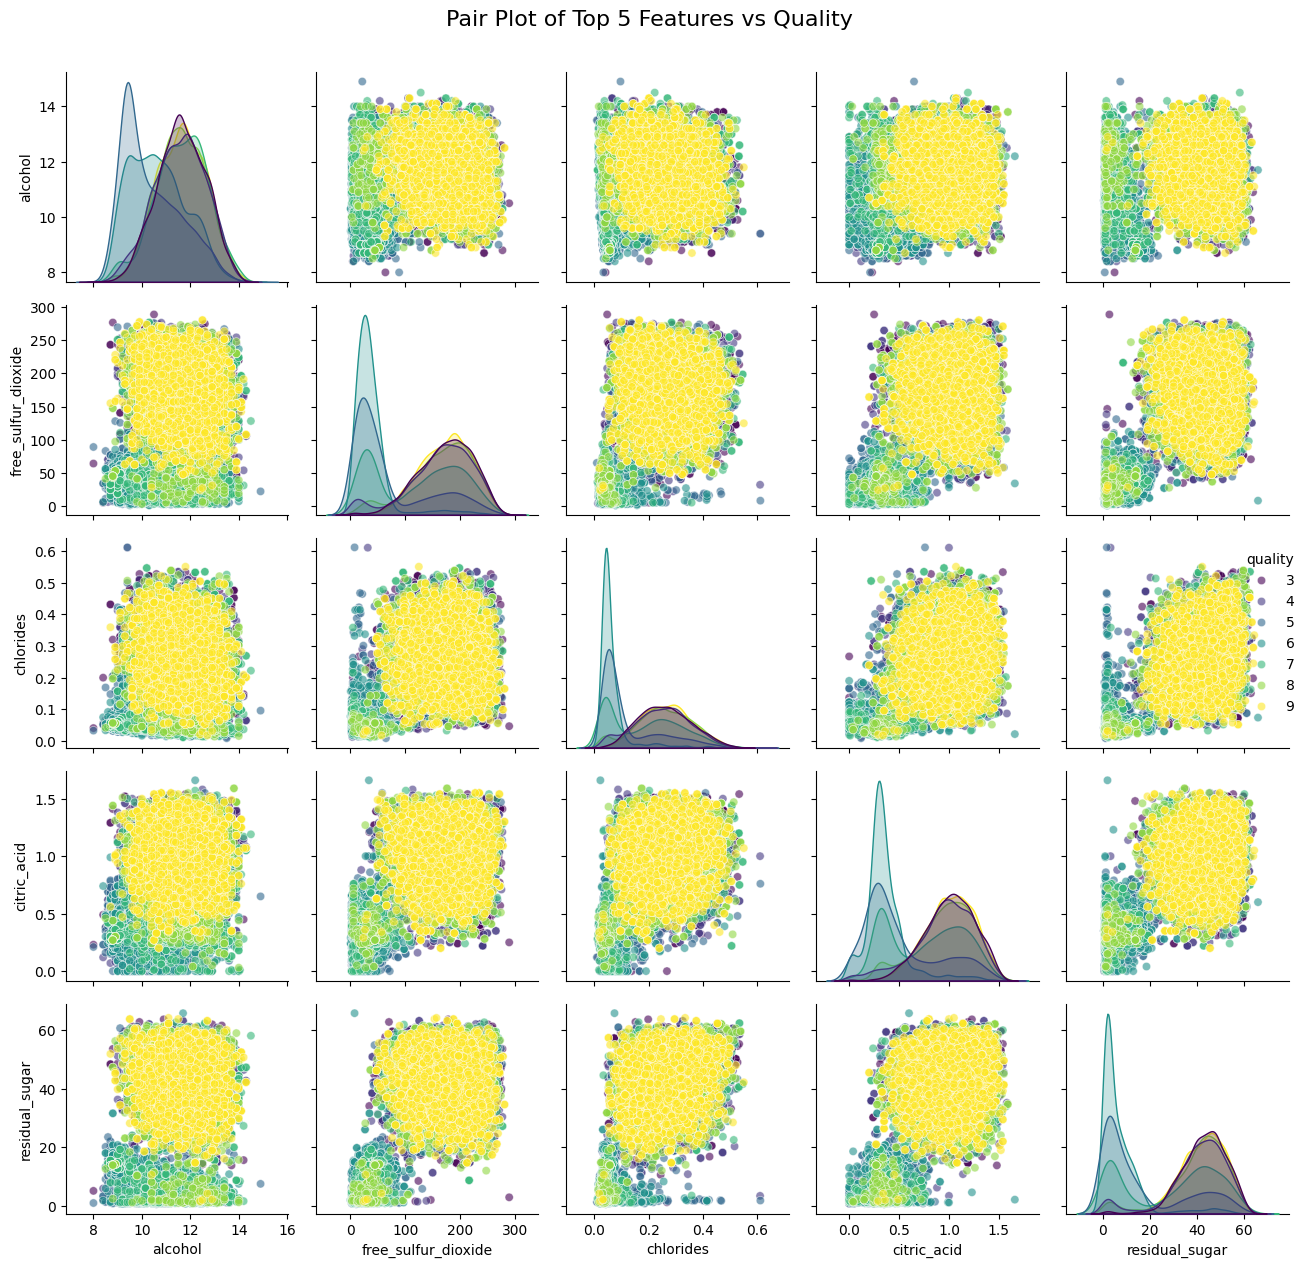

In [16]:
# Get top features most correlated with quality
quality_corr = correlation_matrix['quality'].abs().sort_values(ascending=False)
top_features = quality_corr[1:6].index.tolist()  # Top 5 features excluding quality itself

print("Top 5 features correlated with quality:")
print(quality_corr[1:6])

# Pair plot for top features
sns.pairplot(df[top_features + ['quality']], hue='quality', palette='viridis', 
             diag_kind='kde', plot_kws={'alpha': 0.6})
plt.suptitle('Pair Plot of Top 5 Features vs Quality', y=1.01, fontsize=16)
plt.tight_layout()
plt.show()

## Data Imputation

Handling missing values in the dataset.

In [17]:
# Check for missing values again
print("Missing values per column:")
print(df.isnull().sum())
print(f"\nTotal missing values: {df.isnull().sum().sum()}")

# Example imputation strategies (if needed):
# 1. For numerical features: use mean, median, or forward/backward fill
# 2. For categorical features: use mode or a constant value

# Example code (commented out since we have no missing values):
# from sklearn.impute import SimpleImputer
# imputer = SimpleImputer(strategy='mean')  # or 'median', 'most_frequent'
# df[numerical_columns] = imputer.fit_transform(df[numerical_columns])

Missing values per column:
fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Total missing values: 0


## Target Encoding

Encoding the 'quality' column for modeling.

In [18]:
from sklearn.preprocessing import LabelEncoder

# Check unique values in quality column
print("Unique quality values:", sorted(df['quality'].unique()))
print("Value counts:")
print(df['quality'].value_counts().sort_index())

# Encode quality column (convert to 0-based indexing if needed)

le = LabelEncoder()
df['quality_encoded'] = le.fit_transform(df['quality'])


Unique quality values: [3, 4, 5, 6, 7, 8, 9]
Value counts:
3    3000
4    2999
5    2996
6    2991
7    2997
8    2999
9    3000
Name: quality, dtype: int64


In [19]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,quality_encoded
0,11.6,0.580,0.66,2.20,0.074,10.0,47.0,1.00080,3.25,0.57,9.0,3,0
1,10.4,0.610,0.49,2.10,0.200,5.0,16.0,0.99940,3.16,0.63,8.4,3,0
2,7.4,1.185,0.00,4.25,0.097,5.0,14.0,0.99660,3.63,0.54,10.7,3,0
3,10.4,0.440,0.42,1.50,0.145,34.0,48.0,0.99832,3.38,0.86,9.9,3,0
4,8.3,1.020,0.02,3.40,0.084,6.0,11.0,0.99892,3.48,0.49,11.0,3,0


## Feature Scaling and Normalization

Scaling numerical features to ensure they are on a similar scale for modeling.

In [20]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

features_to_scale = [col for col in df.columns if col not in ['Id', 'quality', 'quality_encoded']]

print(f"Features to scale: {features_to_scale}")
print("\nOriginal feature statistics:")
print(df[features_to_scale].describe())

# StandardScaler (Z-score normalization: mean=0, std=1)
scaler_standard = StandardScaler()
df_scaled_standard = df.copy()
df_scaled_standard[features_to_scale] = scaler_standard.fit_transform(df[features_to_scale])

# MinMaxScaler (scales to range [0, 1])
scaler_minmax = MinMaxScaler()
df_scaled_minmax = df.copy()
df_scaled_minmax[features_to_scale] = scaler_minmax.fit_transform(df[features_to_scale])

print("\n\nStandardScaler (Z-score) statistics:")
print(df_scaled_standard[features_to_scale].describe())

print("\n\nMinMaxScaler statistics:")
print(df_scaled_minmax[features_to_scale].describe())

# Keep the StandardScaler version as default
df_scaled = df_scaled_standard.copy()

Features to scale: ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol']

Original feature statistics:
       fixed_acidity  volatile_acidity   citric_acid  residual_sugar  \
count   20982.000000      20982.000000  20982.000000    20982.000000   
mean        9.800627          0.775062      0.794297       31.312415   
std         2.411728          0.364968      0.384582       19.005952   
min         3.800000          0.080000      0.000000        0.600000   
25%         7.600000          0.430000      0.410000        9.900000   
50%        10.000000          0.830000      0.870000       37.600000   
75%        11.800000          1.080000      1.110000       46.800000   
max        15.900000          1.580000      1.660000       65.800000   

          chlorides  free_sulfur_dioxide  total_sulfur_dioxide       density  \
count  20982.000000         20982.000000          

In [21]:

df_scaled.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,quality_encoded
0,0.746111,-0.534476,-0.349212,-1.531789,-1.011514,-1.549287,-1.818415,-0.763562,0.539409,-1.104678,-1.938349,3,0
1,0.248530,-0.452275,-0.791260,-1.537051,-0.002793,-1.614104,-2.127956,-0.879958,0.010934,-0.957717,-2.445859,3,0
2,-0.995421,1.123245,-2.065400,-1.423926,-0.827382,-1.614104,-2.147926,-1.112752,2.770749,-1.178159,-0.500404,3,0
3,0.248530,-0.918081,-0.973280,-1.568620,-0.443108,-1.238168,-1.808429,-0.969750,1.302762,-0.394364,-1.177084,3,0
4,-0.622235,0.671139,-2.013394,-1.468649,-0.931457,-1.601140,-2.177882,-0.919866,1.889957,-1.300627,-0.246649,3,0


In [22]:
df_scaled.to_csv('../data/processed/WineQT_after_EDA.csv')